In [ ]:
import pandas as pd
df = pd.read_csv('lung_cancer_dataset.csv')
df.head()

,patient_id,age,gender,pack_years,radon_exposure,asbestos_exposure,secondhand_smoke_exposure,copd_diagnosis,alcohol_consumption,family_history,lung_cancer
0,100000,69,Male,66.025244,High,No,No,Yes,Moderate,No,No
1,100001,32,Female,12.780800,High,No,Yes,Yes,Moderate,Yes,Yes
2,100002,89,Female,0.408278,Medium,Yes,Yes,Yes,NaN,No,Yes
3,100003,78,Female,44.065232,Low,No,Yes,No,Moderate,No,Yes
4,100004,38,Female,44.432440,Medium,Yes,No,Yes,NaN,Yes,Yes


# Dataset Overview
Our dataset is a health dataset used for understanding how different factors affect lung cancer in patients. The dataset contains 1 identifier (patient_id), 9 features (age, gender, pack_years, radon_exposure, asbestos_exposure, secondhand_smoke_exposure, copd_diagnosis, alcohol_consumption, and family_history), 1 target variable (lung_cancer), and 50,000 entries. Each patient is identified with a unique patient_id and demographic Information, such as age and gender.

The potential risk factors that are being measured are average packs per day throughout the year (pack_years), radon exposure, asbestos exposure, secondhand smoking exposure, diagnosis of chronic obstructive pulmonary disease (COPD), alcohol consumption level, and family history of lung cancer. The variable lung_cancer tells us whether the patient was diagnosed with lung cancer or not, which we can use to determine if a certain risk factor is associated with lung cancer.

There are no overrepresented features; however, the target variable (lung_cancer) is slightly imbalanced, with approximately 69% of patients diagnosed with lung cancer and 31% without.

There are no outliers, because the only variables that could have been outliers are age and pack_years, since those are only numerical data, and they are both evenly distributed with no extreme values.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   patient_id                 50000 non-null  int64  
 1   age                        50000 non-null  int64  
 2   gender                     50000 non-null  object 
 3   pack_years                 50000 non-null  float64
 4   radon_exposure             50000 non-null  object 
 5   asbestos_exposure          50000 non-null  object 
 6   secondhand_smoke_exposure  50000 non-null  object 
 7   copd_diagnosis             50000 non-null  object 
 8   alcohol_consumption        33338 non-null  object 
 9   family_history             50000 non-null  object 
 10  lung_cancer                50000 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 4.2+ MB


In [ ]:
df.dtypes

,0
patient_id,int64
age,int64
gender,object
pack_years,float64
radon_exposure,object
asbestos_exposure,object
secondhand_smoke_exposure,object
copd_diagnosis,object
alcohol_consumption,object
family_history,object


In [ ]:
df.isnull().sum()

,0
patient_id,0
age,0
gender,0
pack_years,0
radon_exposure,0
asbestos_exposure,0
secondhand_smoke_exposure,0
copd_diagnosis,0
alcohol_consumption,16662
family_history,0


# Data Preprocessing
Cleaning and parsing the data.
Dropping missing items and converting strings to ints

In [ ]:
import numpy as np

df['alcohol_consumption'] = df['alcohol_consumption'].fillna('None')

binary_cols = [
    'asbestos_exposure',
    'secondhand_smoke_exposure',
    'copd_diagnosis',
    'family_history',
    'lung_cancer'
]

df[binary_cols] = df[binary_cols].apply(lambda col: col.map({'Yes': 1, 'No': 0}))

df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})
df['radon_exposure'] = df['radon_exposure'].map({'High': 2, 'Medium': 1, 'Low': 0})
df['alcohol_consumption'] = df['alcohol_consumption'].map({'Heavy': 2, 'Moderate': 1, 'None': 0})

conditions = [
    (df['pack_years'] <= 5),
    (df['pack_years'] > 5) & (df['pack_years'] <= 15),
    (df['pack_years'] > 15)
]

labels = ['Light', 'Moderate', 'Heavy']

df['smoking_intensity'] = np.select(conditions, labels, default='Unknown')
df['smoking_intensity'] = df['smoking_intensity'].map({'Heavy': 2, 'Moderate': 1, 'Light': 0})

df.head()

,patient_id,age,gender,pack_years,radon_exposure,asbestos_exposure,secondhand_smoke_exposure,copd_diagnosis,alcohol_consumption,family_history,lung_cancer,smoking_intensity
0,100000,69,1,66.025244,2,0,0,1,1,0,0,2
1,100001,32,0,12.780800,2,0,1,1,1,1,1,1
2,100002,89,0,0.408278,1,1,1,1,0,0,1,0
3,100003,78,0,44.065232,0,0,1,0,1,0,1,2
4,100004,38,0,44.432440,1,1,0,1,0,1,1,2


# Statistical method 1: chi-squared test

H0 - Asbestos exposure does not have an effect on lung cancer

HA - Asbestos exposure does have an effect on lung cancer

In [ ]:
contingency_table = pd.crosstab(df['asbestos_exposure'], df['lung_cancer'])
contingency_table

lung_cancer,No,Yes
asbestos_exposure,,
No,9689,15462
Yes,5947,18902


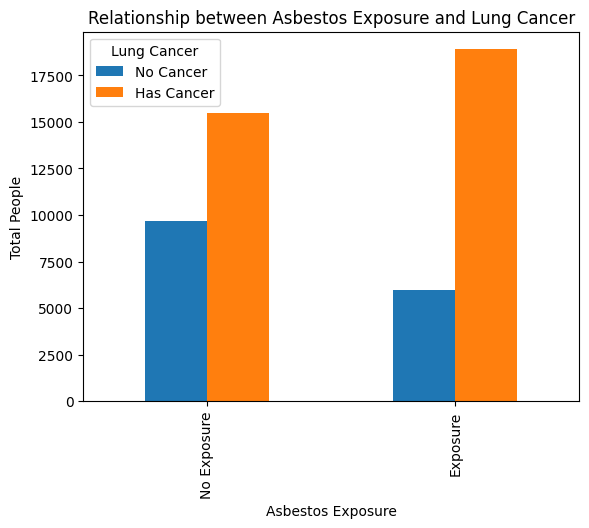

In [ ]:
import matplotlib.pyplot as plt
contingency_table.plot(kind='bar')
plt.xlabel('Asbestos Exposure')
plt.ylabel('Total People')
plt.title('Relationship between Asbestos Exposure and Lung Cancer')
plt.xticks([0, 1], ['No Exposure', 'Exposure'])
plt.legend(title='Lung Cancer', labels= ['No Cancer', 'Has Cancer'])
plt.show()

In [ ]:
import scipy
statistic, pvalue, dof, expected_freq = scipy.stats.contingency.chi2_contingency(contingency_table)
print(f'P-value: {float(pvalue)}')

P-value: 4.4611252333742955e-271


# Conclusion 1
We focus on the relationship between the feature Asbestos Exposure and the target variable Lung cancer. Since these are categorical variables, we chose to go with the chi-squared test. We wanted to find out whether being exposed to a form of a toxic mineral has an effect on getting lung cancer. Since our p-value is less than α=.05, we reject the null hypothesis. We have found significant evidence that asbestos exposure does have an effect on lung cancer.
The bar chart supports this result visually: individuals who were exposed to asbestos show substantially higher counts of lung cancer diagnoses compared to those who were not exposed. This finding aligns with known medical research linking asbestos exposure to an increased risk of lung cancer.
Asbestos exposure is a major environmental factor that significantly increases the likelihood of developing lung cancer, indicating that exposure prevention could have meaningful health impacts.

# Statistical method 2: ANOVA


HO: There is no difference in average packs per day amongst the different alcohol consumption levels

HA: There is a difference in average packs per day for at least one alcohol consumption level


In [ ]:

from scipy.stats import f_oneway
none = df[df['alcohol_consumption'] == 0]
moderate= df[df['alcohol_consumption'] == 1]
heavy = df[df['alcohol_consumption'] == 2]

stat, p_val = f_oneway(none['pack_years'],moderate['pack_years'],heavy['pack_years'])
print(p_val)





0.015215773409360013


Since the p value is less than 0.05, we reject the null hypothesis. This concludes that alcohol consumption does correlate to the smoking levels of a person.

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(
    endog=df['pack_years'],
    groups=df['alcohol_consumption'],
    alpha=0.05
)
print(tukey)


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1   0.8996 0.0125  0.1578 1.6414   True
     0      2   0.5964 0.1416 -0.1433 1.3361  False
     1      2  -0.3032 0.6027 -1.0438 0.4375  False
---------------------------------------------------


The post hoc tests shows that there is a significant difference between the "moderate" and "none" alcohol consumption groups

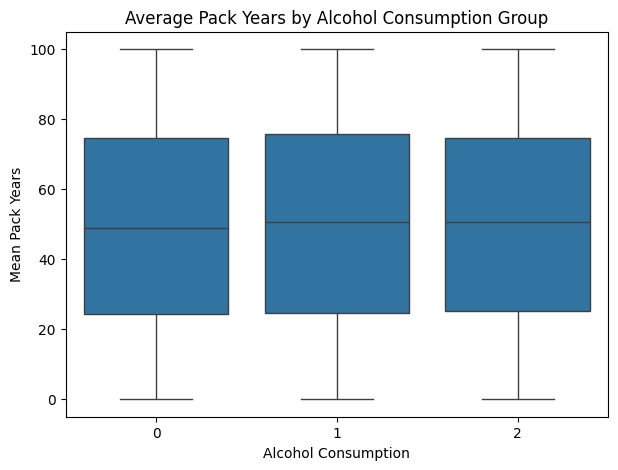

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
sns.boxplot(x='alcohol_consumption', y='pack_years', data=df)
plt.title('Average Pack Years by Alcohol Consumption Group')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Mean Pack Years')
plt.show()


In [ ]:
contingency_table2 = pd.crosstab(df['secondhand_smoke_exposure'], df['lung_cancer'])
contingency_table2

lung_cancer,0,1
secondhand_smoke_exposure,,
0,8920,16013
1,6716,18351


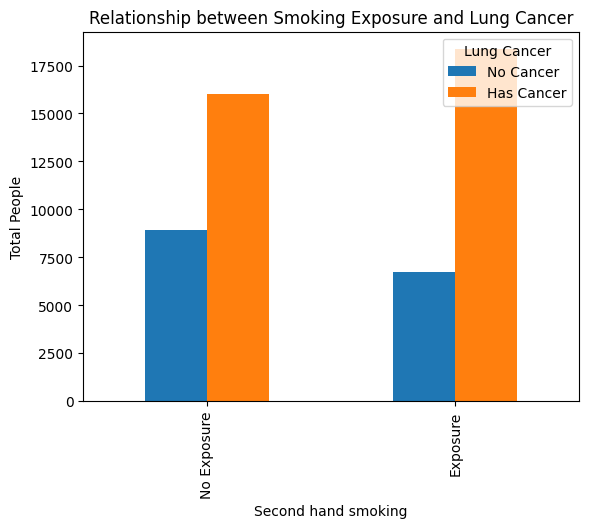

In [ ]:
import matplotlib.pyplot as plt
contingency_table2.plot(kind='bar')
plt.xlabel('Second hand smoking')
plt.ylabel('Total People')
plt.title('Relationship between Smoking Exposure and Lung Cancer')
plt.xticks([0, 1], ['No Exposure', 'Exposure'])
plt.legend(title='Lung Cancer', labels= ['No Cancer', 'Has Cancer'])
plt.show()

In [ ]:
import scipy
statistic, pvalue, dof, expected_freq = scipy.stats.contingency.chi2_contingency(contingency_table2)
print(f'P-value: {float(pvalue)}')

P-value: 5.3853664940314077e-104


# Conclusion 2



For the second test, we wanted to see if there is a correlation between alcohol exposure and smoking levels, denoted as pack_years. Since smoking is known to have an impact on lung cancer, we wanted to test if there is a correlation between alcohol consumption and pack years, as typically both of these lifestyle habits may correlate and cause an impact on lung cancer levels. Exploring this correlation may help us determine if alcohol consumption could contribute to smoking levels and, in turn lung cancer.

Our null hypothesis was that there was no difference in smoking levels (packs per day) between any of the alcohol consumption levels (none, moderate, heavy). The alternative hypothesis indicated that there was a difference in at least one consumption group as compared to the others.

After running the ANOVA test, we obtained a p-value of 0.015, which is less than 0.05. As a result, we reject the null hypothesis, indicating that there is a statistically significant relationship. This concludes that alcohol consumption does correlate with the smoking levels of a person. A further analysis using post hoc with Turkey HSD showed that moderate alcohol consumption had higher alchohol consumption compared to non-drinkers, as seen by the p value of 0.0125. This was done to find out which groups differ, and by how much they differ. However, none of these differences are very large or significant. In the box plot, we see that the means of moderate and heavy are slightly higher than that of the none group, as seen by the black line. However, the moderate mean is slightly higher than the heavy group mean, indicating that the biggest difference in mean is between "none" and "moderate". This is confirmed by the post-hoc test.

After completing this ANOVA test, a chi-squared test was done to investigate a correlation between secondhand smoke and lung cancer. The p-value of 5e104 indicates that we reject the null hypothesis and that secondhand smoke exposure has an impact on lung cancer. This is also illustrated by the graph, as there are more lung cancer instances amongst those who have the exposure as compared to those who don't.

# Statistical method 3: T-test: Age vs Lung Cancer



H0: People with and without lung cancer have the same mean age

HA: People with and without lung cancer have  different mean ages






In [ ]:
from scipy import stats


age_cancer = df[df['lung_cancer'] == 1]['age']
age_no_cancer = df[df['lung_cancer'] == 0]['age']

stat, p_val = stats.ttest_ind(age_cancer, age_no_cancer)

print(f'P-value: {float(p_val)}')
print(f'T-stat: {float(stat)}')



P-value: 3.1883581525153105e-162
T-stat: 27.241939853277565


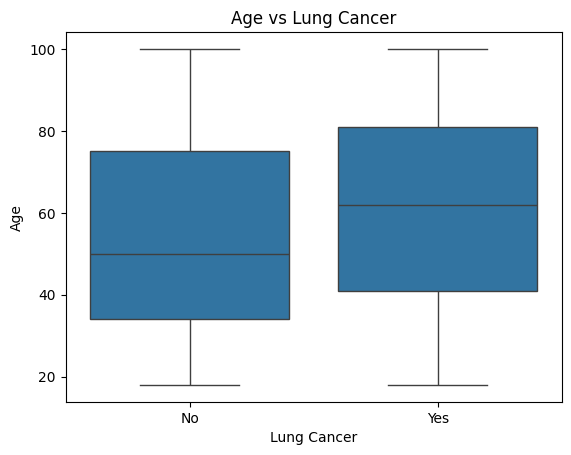

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='lung_cancer', y='age', data=df)
plt.title('Age vs Lung Cancer')
plt.xlabel('Lung Cancer')
plt.ylabel('Age')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

Since the P-Value is less than 0.05, we reject the null hypothesis. We can conclude that people with and without lung cancer have different mean ages.

# Conclusion 3
For this test, we wanted to compare the mean ages of individuals with and without lung cancer to determine if age is associated with cancer occurrence. Age is an important factor to examine, as the likelihood of developing lung cancer is often associated with older age groups. We chose a two sample t-test for this analysis because we were comparing means of two different groups.

After running the t-test, we obtained a p-value  less than 0.05, leading us to reject the null hypothesis, which stated that the mean ages of both groups are equal.

We plotted a boxplot to show the difference between the median ages of the two groups. This boxplot suggests that age is associated with lung cancer status in this dataset. Patients diagnosed with lung cancer tend to be older than those without lung cancer.

Overall, this analysis suggests that age is significantly associated with lung cancer. While this does not imply direct causation, it highlights age as a potential contributing or correlated factor in lung cancer presence.